In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import functools
import math
import pandas as pd
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

In [2]:
def f(x, k=1, omega=50):
    return np.log(1 + k * x) * np.cos(omega * x)

In [3]:
def f(x, k=1, omega=50):
    return np.log(1 + k * x) * np.cos(omega * x)

In [4]:
A = 0
B = 4

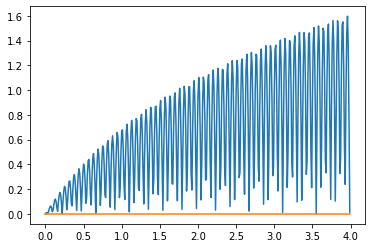

In [5]:
x_points = np.arange(A, B, 0.01)
plt.plot(x_points, np.abs(f(x_points)))
plt.plot(x_points, np.zeros(len(x_points)))

In [20]:
def trapezoid(f_, a, b, n=50):
    h = (b - a) / n
    x = np.linspace(a, b, n)
    f = f_(x)
    res = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])
    
    return res

In [23]:
n_intervals = 2
h = (0 + 4) / n_intervals
I_1 = trapezoid(f, 0, 4, 2 + 1)
I_1_2 = trapezoid(f, 0, 4, 4 + 1)
eps = 10e-5
i = 1
while abs(I_1 - I_1_2) / (2 ** 4 - 1) > eps:
    print(f"n = {n_intervals}, 2n = {2*n_intervals}")
    print(f"h = {h}, h/2 = {h/2}")
    n_intervals *= 2
    I_1 = trapezoid(f, 0, 4, n_intervals + 1)
    I_1_2 = trapezoid(f, 0, 4, 2 * n_intervals + 1)
    h = (1 + 3) / n_intervals
    print(f"I_h = {I_1}, I_h/2 = {I_1_2}")
    if abs(I_1 - I_1_2) / (2 ** 4 - 1) > eps:
        print(f"|I_h - I_h/2| / (2^4 -1)  = {abs(I_1 - I_1_2) / (2 ** 4 - 1)} > {eps}")
    else:
        print(f"|I_h - I_h/2| / (2^4 -1)  = {abs(I_1 - I_1_2) / (2 ** 4 - 1)} <  {eps}")
    print()

n = 2, 2n = 4
h = 2.0, h/2 = 1.0
I_h = 2.3821073593392548, I_h/2 = 2.7160491807522362
|I_h - I_h/2| / (2^4 -1)  = 0.022262788094198762 > 0.0001

n = 4, 2n = 8
h = 1.0, h/2 = 0.5
I_h = 2.7160491807522362, I_h/2 = 2.894452532289727
|I_h - I_h/2| / (2^4 -1)  = 0.011893556769166065 > 0.0001

n = 8, 2n = 16
h = 0.5, h/2 = 0.25
I_h = 2.894452532289727, I_h/2 = 2.9869869715081236
|I_h - I_h/2| / (2^4 -1)  = 0.0061689626145597625 > 0.0001

n = 16, 2n = 32
h = 0.25, h/2 = 0.125
I_h = 2.9869869715081236, I_h/2 = -0.0012260931309396822
|I_h - I_h/2| / (2^4 -1)  = 0.1992142043092709 > 0.0001

n = 32, 2n = 64
h = 0.125, h/2 = 0.0625
I_h = -0.0012260931309396822, I_h/2 = -0.02241340821275038
|I_h - I_h/2| / (2^4 -1)  = 0.001412487672120713 > 0.0001

n = 64, 2n = 128
h = 0.0625, h/2 = 0.03125
I_h = -0.02241340821275038, I_h/2 = -0.02694051705586007
|I_h - I_h/2| / (2^4 -1)  = 0.00030180725620731276 > 0.0001

n = 128, 2n = 256
h = 0.03125, h/2 = 0.015625
I_h = -0.02694051705586007, I_h/2 = -0.02806280

In [7]:
def trig_int(a, b, k, flag, m=50):
    assert type(k) == int, "int"
    assert flag == "sin" or flag == "cos", "sin or cos"
    
    def xk_sinmx(x): return (x ** k) * np.sin(m * x)
    def xk_cosmx(x): return (x ** k) * np.cos(m * x)
    def fb_fa(f, a, b): return f(b) - f(a)
    
    if k == 0:
        if flag == "cos":  # int_a^b cos(mx) dx
            return (1 / m) * (np.sin(b * m) - np.sin(a * m))
        
        # int_a^b sin(mx) dx
        return -(1 / m) * (np.cos(b * m) - np.cos(a * m))
    if flag == "cos":  # int_a^b x^k * cos(mx)dx
        return (1 / m) * ( 
                fb_fa(xk_sinmx, a, b)
                - k * trig_int(a, b, k - 1, "sin", m)
            )
    
    # int_a^b x^k * sin(mx)dx
    return (-1 / m) * ( 
            fb_fa(xk_cosmx, a, b)
            - k * trig_int(a, b, k - 1, "cos", m)
        )

In [8]:
def chebyshev_nodes(a, b, n):
    """
    Generate n Chebyshev nodes
    for segment [a, b]
    """
    # for [-1, 1]
    k = np.arange(n)
    x = np.cos(np.pi * (2 * k[:] + 1) / (2 * n))
    
    # [-1, 1] to [a, b]
    def f(t): return (b - a) * t / 2 + (b + a) / 2
    x_ab = f(x)
    
    return x_ab[::-1]

In [9]:
points = chebyshev_nodes(A, B, 18)

In [10]:
def s(x, k=1):
    return np.log(1 + k * x) 

In [11]:
lagrange_poly = lagrange(points, s(points))
poly_coef = Polynomial(lagrange_poly).coef[::-1]
print(poly_coef)

[ 7.11156044e-09  9.99998842e-01 -4.99967950e-01  3.32973791e-01
 -2.47816498e-01  1.91670126e-01 -1.44748633e-01  1.00282475e-01
 -6.04014344e-02  3.03886091e-02 -1.24111537e-02  4.02348476e-03
 -1.01309172e-03  1.93000810e-04 -2.67982592e-05  2.55300886e-06
 -1.48976915e-07  4.01070523e-09]


In [12]:
L = sum(poly_coef[k] * trig_int(A, B, k, "cos", 50) 
               for k in range(len(poly_coef)))

In [17]:
print(L, trapezoid(f, A, B, 1000), scipy.integrate.quad(f, A, B)[0])

-0.028472211904985834 -0.028350220756964837 -0.02847134275849445
